<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C5/C5.html"><img src="../data/C5_nav.png" width="100"  style="float:right;" alt="C5"></a>
<h1>Experiments: Beatles Collection</h1> 
</div>

<br/>

<p>
Following Section 5.2.4 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we conduct in this notebook some experiments using examples from the Beatles collection. For an introduction to the Beatles collection and more comprehensive experiments, we refer to the following literature:

<ul>
    
<li><span style="color:black">
Christopher Harte, Mark B. Sandler, Samer Abdallah, Emilia Gómez: <strong>Symbolic Representation of Musical Chords: A Proposed Syntax for Text Annotations.</strong> Proceedings of the International Society for Music Information Retrieval Conference (ISMIR), London, UK, 2005, pp. 66&ndash;71. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_HarteSAG05_ChordRecognition_ISMIR.txt"> Bibtex </a>
</span></li>
    
<li><span style="color:black">
Nanzhu Jiang, Peter Grosche, Verena Konz, Meinard Müller: <strong>Analyzing Chroma Feature Types for Automated Chord Recognition.</strong> Proceedings of the AES Conference on Semantic Audio, Ilmenau, Germany, 2011. 
<br>    
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_JiangGKM11_Chord_AES.txt"> Bibtex </a>
</span></li>

<li><span style="color:black">
Taemin Cho, Juan Pablo Bello: <strong>On the Relative Importance of Individual Components of Chord Recognition Systems.</strong> IEEE/ACM Transactions on Audio, Speech, and Language Processing, 22 (2014), pp. 466&ndash;492. 
<br>    
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_ChoB14_Chord_IEEE-TASLP.txt"> Bibtex </a>
</span></li>
</ul>    
    
</p> 

## Beatles Collection

Chord recognition as considered in Chapter 5 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a> has always been and still is one of the central tasks in the field of music information retrieval (MIR). Besides chords being a central concept in particular for Western music, another reason for the topic's popularity (already at an early stage of MIR) is the availability of a dataset known as the **Beatles Collection**. This dataset is based on twelve Beatles albums comprising $180$ audio tracks in total. While being a well-defined, medium-sized collection of musical relevance, the main value of the dataset lies in the availability of high-quality **reference annotations** for chords, beats, key changes and music structures. These annotations are freely available for research purposes. As a result, the Beatles collection has been used widely as benchmark dataset for a multitude of MIR tasks including [chord recognition](../C5/C5.html), [beat tracking](../C6/C6.html), and [music structure analysis](../C4/C4.html). A list of all songs as well as links to all reference annotations can be found at the <a href="http://isophonics.net/content/reference-annotations-beatles">Isophonics Website</a>. 

The original chord annotations, which were supplied by Christopher Harte, go beyond the $24$ chord types we consider in our [basic chord recognition scenario](../C5/C5S2_ChordRec_Templates.html). A detailed description of the chord syntax, transcription process, and verification process for the Beatles collection can found in [Christopher Harte's PhD thesis (2010)](http://isophonics.net/content/reference-annotations-beatles). In our [chord recognition scenario](../C5/C5S2_ChordRec_Templates.html), the reference annotations are reduced to $24$ chord labels corresponding to the major an minor triads. In this reduction, we consider only the first two intervals of each chord in root position, where augmented chords are mapped to major chords and diminished chords to minor chords. In the case that no meaningful reduction is possible or that no meaningful chord information exists, the non-chord label $\mathbf{N}$ is used. 

In the following code cell, we show for the beginning of the Beatles song "Let It Be" the reference chord annotations as originally specified by Harte as well as the annotations after the reduction process.

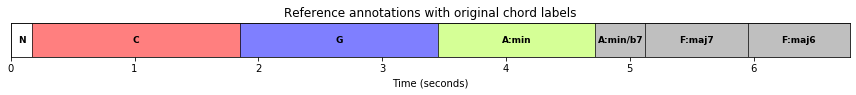

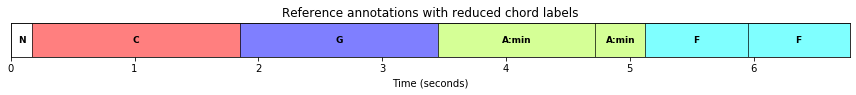

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import librosa

import sys
sys.path.append('..')
import LibFMP.B
import LibFMP.C3
import LibFMP.C4
import LibFMP.C5
%matplotlib inline

# Read annotation files
fn_ann_orig = os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_LetItBe_Beatles_1970-LetItBe-06_Chords.csv')
fn_ann = os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_LetItBe_Beatles_1970-LetItBe-06_Chords_simplified.csv')
ann_orig, _ = LibFMP.C4.read_structure_annotation(fn_ann_orig)
ann, _ = LibFMP.C4.read_structure_annotation(fn_ann)

# Plot chord annotations
color_ann = {'N': 'white', 
             'C': 'red', 'C#': 'peru', 'D': 'orange', 'D#': 'yellow', 'Eb': 'yellow', 
             'E': 'springgreen', 'F': 'cyan', 'F#': 'coral', 'G': 'blue', 
             'G#': 'olive', 'A': 'teal', 'A#': 'indigo', 'Bb': 'indigo', 'B': 'pink',
             'C#:min': 'steelblue', 'C#m': 'steelblue', 'A:min': 'greenyellow', 'A:m': 'greenyellow',
             'G:min': 'olive', 'E:min': 'lightcoral', 'B:min': 'saddlebrown'}
chord_labels = LibFMP.C5.get_chord_labels(ext_minor='m', nonchord=False)

LibFMP.B.plot_segments(ann_orig[:7], figsize=(12, 1.2), time_label='Time (seconds)', 
                        fontsize=9, colors=color_ann, alpha=0.5)
plt.title('Reference annotations with original chord labels')
plt.show()
LibFMP.B.plot_segments(ann[:7], figsize=(12, 1.2), time_label='Time (seconds)', 
                       fontsize=9, colors=color_ann, alpha=0.5)
plt.title('Reference annotations with reduced chord labels')
plt.show()

## Song Selection

As said above, the Beatles collection with its annotations has triggered a lot of research efforts for various MIR tasks. In particular, the Beatles dataset (or extended collections such as the [Isophonics dataset](http://isophonics.net/content/reference-annotations)) have been extensively used for training, testing, and comparing automated chord recognition approaches. However, due to its massive usage, there is not much room for improving chord recognition results on the Beatles dataset without the imminent danger of **overfitting**. Still, the Beatles collection is an excellent testbed for developing, testing, and exploring the potential and limitation of algorithmic approaches. Inspired by the article by [Cho and Bello](https://ieeexplore.ieee.org/document/6691936), we conduct in the following some experiments on the role and interdependencies of chord recognition components. However, using the entire collection of 180 Beatles songs is beyond the scope of the FMP notebooks. Instead, to illustrate the nature of such experiments, we just use four representative Beatles songs of comparatively short duration. Also, these songs have only short non-musical passages (e.g., silence or applause) at the beginning and end.

<table style="border:none;text-align:left;">
   <tr>
      <th style="border:none;text-align:left;">ID</th>
      <th style="border:none;text-align:left;">Short Name</th> 
      <th style="border:none;text-align:left;">Song Title</th>
      <th style="border:none;text-align:left;">Audio</th>
   </tr>

   <tr>
      <td style="border:none;text-align:left;">0</td> 
      <td style="border:none;text-align:left;">LeItB</td>
      <td style="border:none;text-align:left;">Let It Be</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C5/FMP_C5_Audio_Beatles_LetItBe_Beatles_1970-LetItBe-06.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>    
        
   <tr>
      <td style="border:none;text-align:left;">1</td> 
      <td style="border:none;text-align:left;">HereCo</td>
      <td style="border:none;text-align:left;">Here Comes The Sun</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C5/FMP_C5_Audio_Beatles_HereComesTheSun_Beatles_1969-AbbeyRoad-07.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
   
   <tr>
      <td style="border:none;text-align:left;">2</td>        
      <td style="border:none;text-align:left;">ObLaDi</td>
      <td style="border:none;text-align:left;">Ob-La-Di, Ob-La-Da</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C5/FMP_C5_Audio_Beatles_ObLaDiObLaDa_Beatles_1968-TheBeatlesTheWhiteAlbumDisc1-04.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>
    
   <tr>
      <td style="border:none;text-align:left;">3</td>             
      <td style="border:none;text-align:left;">PennyL</td>
      <td style="border:none;text-align:left;">Penny Lane</td>
      <td style="border:none;text-align:left;">
         <audio src="../data/C5/FMP_C5_Audio_Beatles_PennyLane_Beatles_1967-MagicalMysteryTour-09.mp3" type="audio/mpeg" controls="controls"></audio>
      </td>
   </tr>    
   
</table>

In the following code cell, we define a dictionary that specifies the audio and annotation files for the four songs. Furthermore, we show the beginning of each of the songs' reference chord annotations in its original form (Harte) and its reduced form (with only $24$ major and minor triads).

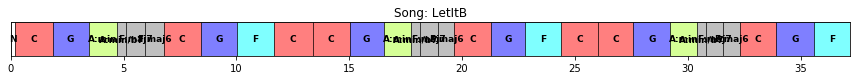

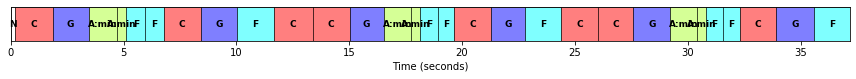

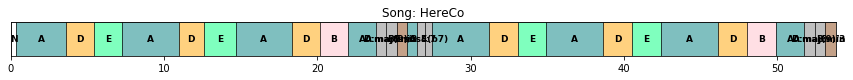

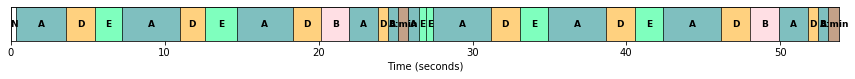

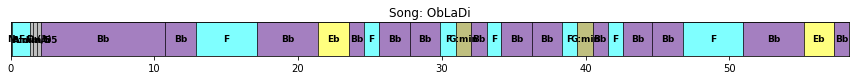

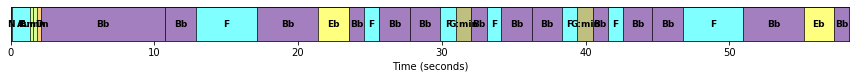

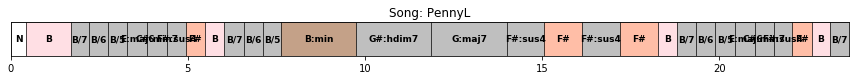

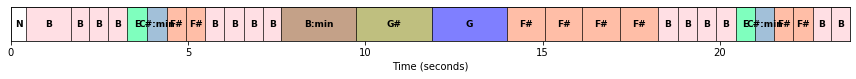

In [3]:
directory =  os.path.join('..', 'data', 'C5')

song_dict = {}
song_dict[0] = ['LetItB', 'r',
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_LetItBe_Beatles_1970-LetItBe-06.wav'),
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_LetItBe_Beatles_1970-LetItBe-06_Chords_simplified.csv')]
song_dict[1] = ['HereCo', 'b',
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_HereComesTheSun_Beatles_1969-AbbeyRoad-07.wav'),
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_HereComesTheSun_Beatles_1969-AbbeyRoad-07_Chords_simplified.csv')]
song_dict[2] = ['ObLaDi', 'c',
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_ObLaDiObLaDa_Beatles_1968-TheBeatlesTheWhiteAlbumDisc1-04.wav'),
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_ObLaDiObLaDa_Beatles_1968-TheBeatlesTheWhiteAlbumDisc1-04_Chords_simplified.csv')]
song_dict[3] = ['PennyL', 'g',
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_PennyLane_Beatles_1967-MagicalMysteryTour-09.wav'),
                os.path.join('..', 'data', 'C5', 'FMP_C5_Audio_Beatles_PennyLane_Beatles_1967-MagicalMysteryTour-09_Chords_simplified.csv')]

chord_labels = LibFMP.C5.get_chord_labels(ext_minor='m', nonchord=False)
song_selected = [0, 1, 2, 3]

for s in song_selected:
    song_id = song_dict[s][0]
    fn_ann = song_dict[s][3]
    fn_ann_orig = fn_ann.replace('_simplified','')

    ann_orig, _ = LibFMP.C4.read_structure_annotation(fn_ann_orig)
    ann, _ = LibFMP.C4.read_structure_annotation(fn_ann)

    LibFMP.B.plot_segments(ann_orig[:30], figsize=(12, 1), 
                           fontsize=9, colors=color_ann, alpha=0.5)
    plt.title('Song: %s' % song_id)
    plt.show()
    LibFMP.B.plot_segments(ann[:30], figsize=(12, 1.2), time_label='Time (seconds)', 
                           fontsize=9, colors=color_ann, alpha=0.5)
    plt.show()

## Feature Extraction

As we detailed in the [FMP notebook on template-based chord recognition](../C5/C5S2_ChordRec_Templates.html), the first step of traditional chord recognition approaches is to convert the audio recording into a sequence of [chroma-based audio features](../C3/C3S1_SpecLogFreq-Chromagram.html). These features can often be further processed, for example, by applying suitable [smoothing filters](../C3/C3S1_FeatureSmoothing.html) to even out temporal outliers or by applying [logarithmic compression](../C3/C3S1_LogCompression.html) to enhance small, yet perceptually relevant spectral components. The chroma type used may have a strong influence on the chord recognition results, as has been demonstrated by [Jiang et al.](https://secure.aes.org/forum/pubs/conferences/?elib=15943) We illustrate this fact by considering three different chroma types provided by `librosa`:

* STFT-based chroma features (`librosa.feature.chroma_stft`) with small logarithmic compression.  
* CQT-based chroma features (`librosa.feature.chroma_cqt`).
* IIR-based chroma features (`librosa.iirt` + chroma binning) with logarithmic compression.

The audio recording is sampled at a rate of $F_\mathrm{s}=22050~\mathrm{Hz}$. For the [STFT computation](../C2/C2_STFT-Basic.html), we use a window size of $N=2048$ samples (corresponding to $92.9~\mathrm{ms}$) and a hope size of $H=1024$ samples (corresponding to $46.4~\mathrm{ms}$). This leads to a feature rate of $21.5~\mathrm{Hz}$. Furthermore, to compute the IIR-based time&ndash;frequency representation, we use the same parameters $N$ and $H$. Finally, as for the CQT, we use the same hop size $H=1024$ yielding a chroma representation of the same feature rate. All chroma features are normalized with respect to the [Euclidean norm](../C3/C3S1_FeatureNormalization.html). In the following code cell, we compute the three chroma representations for all selected songs and store them in dictionaries used for the subsequent experiments. Furthermore, as described in the [FMP notebook on chord recognition evaluation](../C5/C5S2_ChordRec_Eval.html), we convert the chord annotations into frame-level label sequences to match the chroma sequences.

In [4]:
def compute_X_dict(song_selected, version='STFT', details=True):
    X_dict = {}
    Fs_X_dict = {}
    ann_dict = {}
    x_dur_dict = {}
    chord_labels = LibFMP.C5.get_chord_labels(ext_minor='m', nonchord=False)
    for s in song_selected:
        if details is True:
            print('Processing: ', song_dict[s][0])
        fn_wav = song_dict[s][2]
        fn_ann = song_dict[s][3]
        N = 2048
        H = 1024
        if version == 'STFT':
            X, Fs_X, x, Fs, x_dur = \
                LibFMP.C5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=0.1, version='STFT')
        if version == 'CQT':
            X, Fs_X, x, Fs, x_dur = \
                LibFMP.C5.compute_chromagram_from_filename(fn_wav, H=H, version='CQT')
        if version == 'IIR':
            X, Fs_X, x, Fs, x_dur = \
                LibFMP.C5.compute_chromagram_from_filename(fn_wav, N=N, H=H, gamma=10, version='IIR')
        X_dict[s] = X
        Fs_X_dict[s] = Fs_X
        x_dur_dict[s] = x_dur
        N_X = X.shape[1]
        ann_dict[s] = LibFMP.C5.convert_chord_ann_matrix(fn_ann, chord_labels, Fs=Fs_X, N=N_X, last=False)
    return X_dict, Fs_X_dict, ann_dict, x_dur_dict, chord_labels
    
song_selected = [0, 1, 2, 3]
#song_selected = [0]
print('===== Computation of STFT-based chromagrams =====')
X_dict_STFT, Fs_X_dict_STFT, ann_dict_STFT, x_dur_dict, chord_labels = compute_X_dict(song_selected, version='STFT')
print('===== Computation of CQT-based chromagrams =====')
X_dict_CQT, Fs_X_dict_CQT, ann_dict_CQT, x_dur_dict, chord_labels = compute_X_dict(song_selected, version='CQT')
print('===== Computation of IIR-based chromagrams =====')
X_dict_IIR, Fs_X_dict_IIR, ann_dict_IIR, x_dur_dict, chord_labels = compute_X_dict(song_selected, version='IIR')

===== Computation of STFT-based chromagrams =====
Processing:  LetItB
Processing:  HereCo
Processing:  ObLaDi
Processing:  PennyL
===== Computation of CQT-based chromagrams =====
Processing:  LetItB


C:\Users\stefa\anaconda3\envs\FMP\lib\site-packages\librosa\util\utils.py:826: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])


Processing:  HereCo


C:\Users\stefa\anaconda3\envs\FMP\lib\site-packages\librosa\util\utils.py:826: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return (x > x_pad[inds1]) & (x >= x_pad[inds2])


Processing:  ObLaDi
Processing:  PennyL
===== Computation of IIR-based chromagrams =====
Processing:  LetItB


TypeError: loop of ufunc does not support argument 0 of type numpy.ndarray which has no callable log method

Next, we show the first fifteen seconds of all three chromagram variants for each of the four songs.

NameError: name 'Fs_X_dict_IIR' is not defined

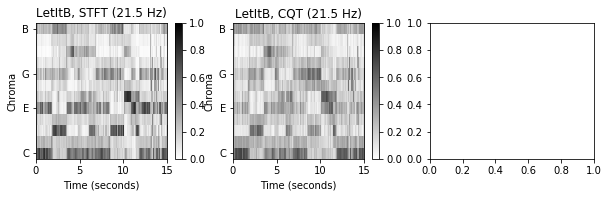

In [5]:
cmap = 'gray_r'
for s in song_selected:
    fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1], 
                                              'height_ratios': [2]}, figsize=(10, 2.5))
    title = '%s, STFT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_STFT[s])
    LibFMP.B.plot_chromagram(X_dict_STFT[s], Fs=Fs_X_dict_CQT[s], ax=[ax[0]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 15])
    
    title = '%s, CQT (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_CQT[s])
    LibFMP.B.plot_chromagram(X_dict_CQT[s], Fs=Fs_X_dict_CQT[s], ax=[ax[1]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 15])  

    title = '%s, IIR (%0.1f Hz)' % (song_dict[s][0], Fs_X_dict_IIR[s])
    LibFMP.B.plot_chromagram(X_dict_IIR[s], Fs=Fs_X_dict_IIR[s], ax=[ax[2]],  
                             chroma_yticks=[0, 4, 7, 11], clim=[0, 1], cmap=cmap,
                             title=title, ylabel='Chroma', colorbar=True, xlim=[0, 15])      
    plt.tight_layout()   

It is worth taking a closer look at the visualizations of the chromagrams. While the STFT-, CQT-, and IIR-based chromagrams for the song "Let It Be" show similar energy distributions over the chroma bands, the chromagrams of the other songs show considerable differences. In particular, the song "Penny Lane" shows a rather homogeneous **STFT-based chromagram** (with a noticeable $\mathrm{F}$ chroma band), while its **CQT-based chromagram** (and to some extent also the **IIR-based chromagram**) exhibits dominant patterns leading downwards. Based on the same audio material, this different nature of the chromagrams is surprising at first sight. When listening to the song, it turns out that there is a strong bassline in the low-frequency range played by the bass guitar. Based on the [**linear frequency resolution of the STFT**](../C3/C3S1_SpecLogFreq-Chromagram.html), this low-frequency information is not captured with the necessary frequency resolution by the STFT. As a result, this information is lost (smeared across different pitch bands) when applying the [logarithmic binning](../C3/C3S1_SpecLogFreq-Chromagram.html) to derive the chromagram. In contrast, the CQT uses a frequency-dependent window size to decompose the signal into a time&ndash;frequency representation with **logarithmic frequency resolution**. As a result, the bassline's low-frequency notes are captured at a much higher spectral resolution compared to the STFT approach, thus clearly showing up in the CQT-based chromagram. In the subsequent experiments, we show how the three chroma-based representations (`STFT`, `CQT`, `IIR`) behave in the context of our chord recognition scenario.

## Chord Recognition Procedures

Based on the thre chromagram representations, we apply two different pattern matching techniques to map the chroma features to chord labels that correspond to the $24$ major and minor triads: 

* [Template-based chord recognition](../C5/C5S2_ChordRec_Templates.html).
* [HMM-based chord recognition](../C5/C5S3_ChordRec_HMM.html).

In the following code cell, we show some chord recognition results using **time&ndash;chord visualizations**  as introduced in the [FMP notebook on chord recognition evaluation](../C5/C5S2_ChordRec_Eval.html). We first have a look at the song "Let It Be" considering the six combinations of the three different input chromagrams (`STFT`, `CQT`, `IIR`) and the two chord recognition procedures (`Template`, `HMM`). 

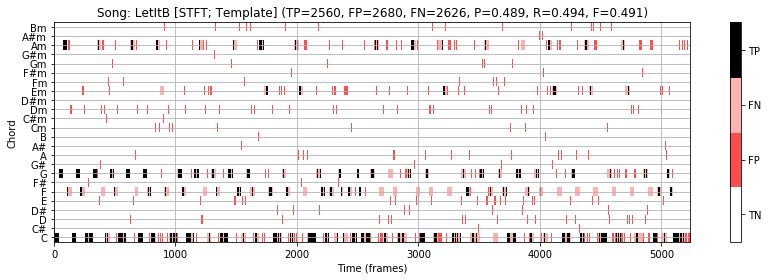

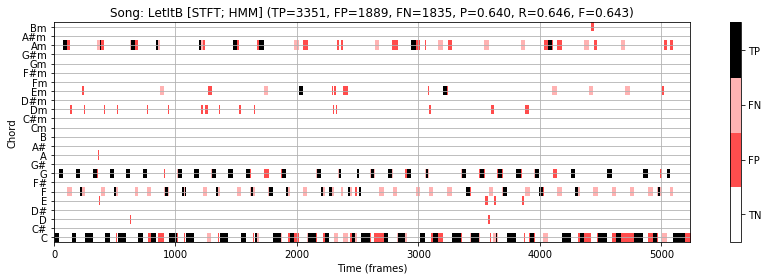

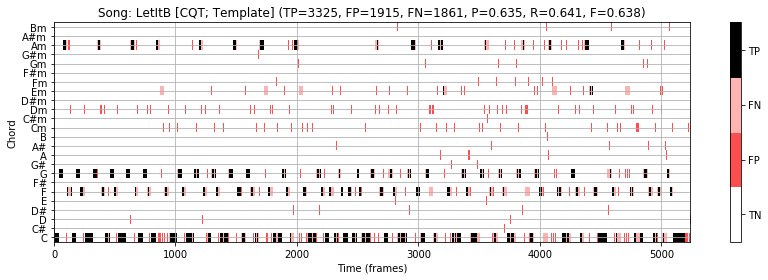

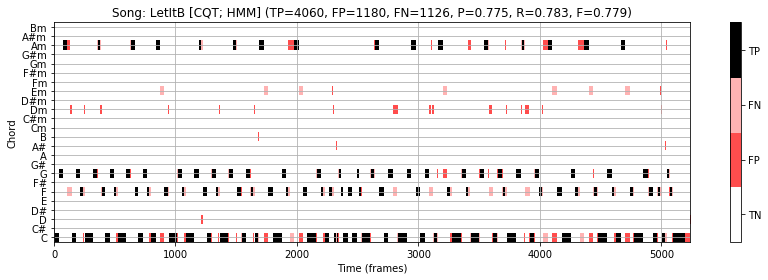

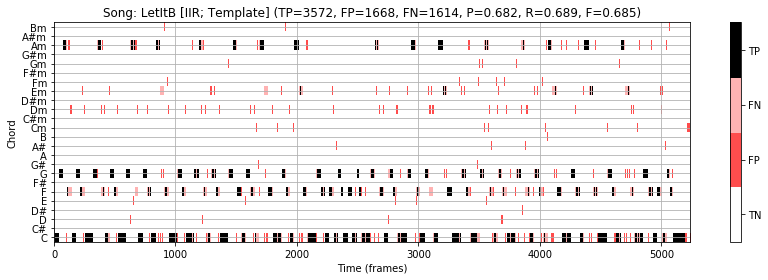

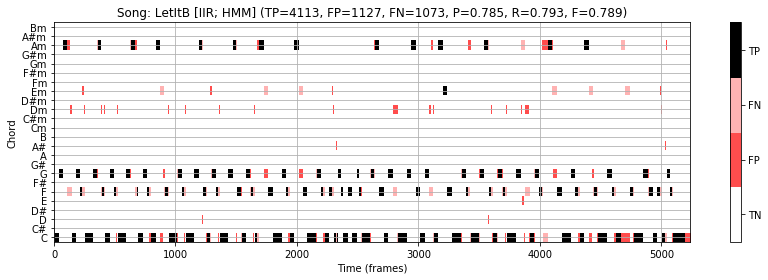

In [5]:
def chord_recognition_all(X, ann_matrix, p=0.15, filt_len=None, filt_type='mean'):
    """Conduct template- and HMM-based chord recognition and evaluates the approaches

    Notebook: C5//C5/C5S3_ChordRec_Beatles.ipynb

    Args:
        X: Chromagram
        ann_matrix: Reference annotation as given as time-chord binary matrix
        p: Self-transition probability used for HMM
        filt_len: Filter length used for prefilitering
        filt_type ('mean', 'meadian'): Filter type used for prefilitering

    Returns:
        result_Tem, result_HMM: Chord recogntion evaluation results [P, R, F, TP, FP, FN]
                                for template- and HMM-based approach
        chord_Tem: Template-based chord recogntion result given as binary matrix
        chord_HMM: HMM-based chord recogntion result given as binary matrix
        chord_sim: Chord similarity matrix
    """
    if filt_len is not None:
        if filt_type == 'mean':
            X, Fs_X = LibFMP.C3.smooth_downsample_feature_sequence(X, Fs=1, filt_len=filt_len, down_sampling=1)
        if filt_type == 'median':
            X, Fs_X = LibFMP.C3.median_downsample_feature_sequence(X, Fs=1, filt_len=filt_len, down_sampling=1)
    # Template-based chord recogntion
    chord_sim, chord_Tem = LibFMP.C5.chord_recognition_template(X, norm_sim='1')
    result_Tem = LibFMP.C5.compute_eval_measures(ann_matrix, chord_Tem)
    # HMM-based chord recogntion
    A = LibFMP.C5.uniform_transition_matrix(p=p)
    C = 1 / 24 * np.ones((1, 24))
    B_O = chord_sim
    chord_HMM, _, _, _ = LibFMP.C5.viterbi_log_likelihood(A, C, B_O)
    result_HMM = LibFMP.C5.compute_eval_measures(ann_matrix, chord_HMM)
    return result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim
    return result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim
    
def plot_chord_recognition_result(ann_matrix, result, chord_matrix, chord_labels,
                                  xlim=None, Fs_X=1, title='', figsize=(12, 4)):
    P, R, F, TP, FP, FN = result
    method='HMM' 
    title = title + ' (TP=%d, FP=%d, FN=%d, P=%.3f, R=%.3f, F=%.3f)' % (TP, FP, FN, P, R, F)
    fig, ax, im = LibFMP.C5.plot_matrix_chord_eval(ann_matrix, chord_matrix, Fs=Fs_X, figsize=figsize,
                         title=title, ylabel='Chord', xlabel='Time (frames)', chord_labels=chord_labels)
    if xlim is not None:
        plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

song_selected = [0]    
for s in song_selected:
    output = chord_recognition_all(X_dict_STFT[s], ann_dict_STFT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [STFT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [STFT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [CQT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)
    
    output = chord_recognition_all(X_dict_IIR[s], ann_dict_IIR[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title = 'Song: %s [IIR; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_Tem, chord_Tem, chord_labels, title=title)
    title = 'Song: %s [IIR; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_IIR[s][0], result_HMM, chord_HMM, chord_labels, title=title)    

Using the STFT-based chromagram in combination with the template-based chord recognizer, one obtains an F-measure of $\mathrm{F}=0.491$. As the visualization shows, there are many sudden jumps between chord labels. Using the HMM-based approach reduces the number of outliers leading to an improved measure of $\mathrm{F}=0.643$. Using the CQT-based chromagram as input representation, the results significantly improve yielding $\mathrm{F}=0.779$ for the HMM-based approach. The best result of $\mathrm{F}=0.789$ is obtained when using the IIR-based chromagram in combination with the HMM-based approach.

* This example shows that the choice of chroma variant may have a substantial impact on the final chord recognition result. 
* Also, it highlights the benefits of the [**postfiltering introduced by the HMM**](../C5/C5S3_ChordRec_HMM.html).

In the next code cell, we show the results for all four selected Beatles songs using the CQT-based input chromagram in combination with the HMM-based chord recognition approach. The F-measures for the four songs are as follows: 

* `LetItB`: $\mathrm{F}=0.779$ 
* `HereCo`: $\mathrm{F}=0.750$
* `ObLaDi`: $\mathrm{F}=0.895$
* `PennyL`: $\mathrm{F}=0.715$

Averaging these numbers on the song level yields a mean F-measure of $\mathrm{F}=0.785$. This is roughly the value one also obtains for the entire Beatles collections ($180$ songs) when applying a simple HMM-based chord recognition approach. More recent data-driven chord recognition approaches (e.g., using techniques based on deep neural network) achieve recognition rates between $80$ and $90$ percent for the Beatles collection. In general, such numbers need to be taken with caution, since they only give limited insights into the complexity of the dataset, the appropriateness of the model assumption, the reliability of the annotations, and the musical meaningfulness of the results. We come back to the musical relevance of such evaluation numbers later in this notebook.

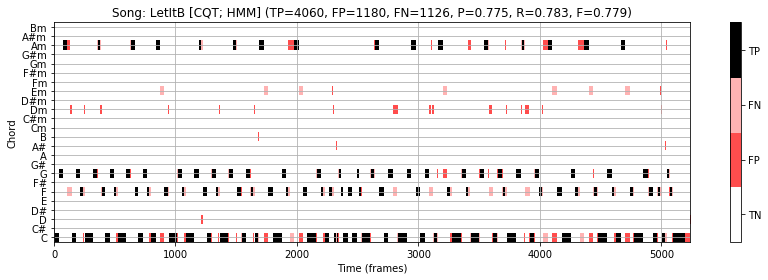

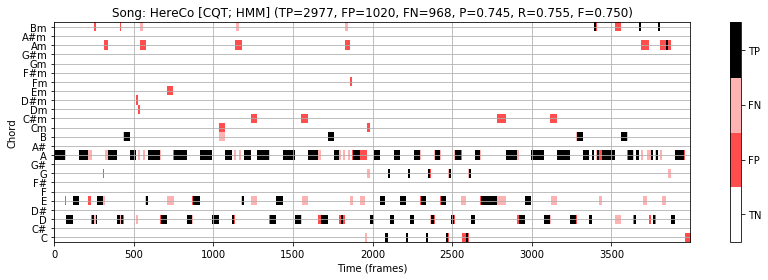

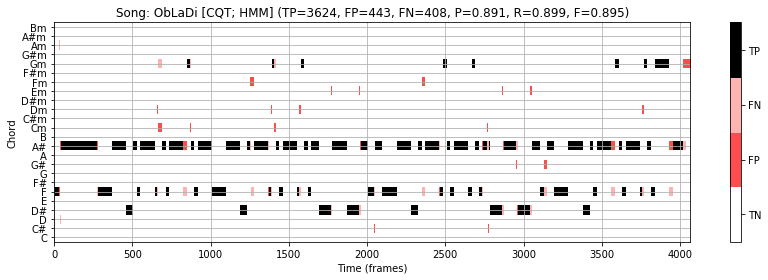

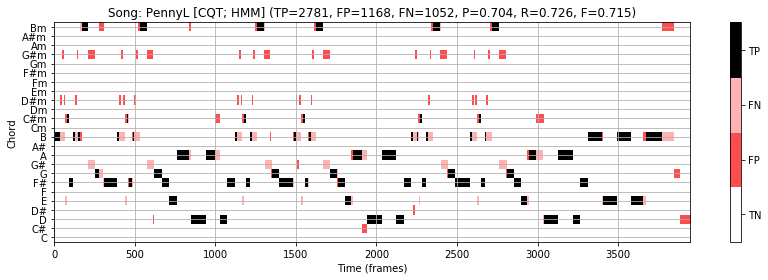

In [6]:
song_selected = [0, 1, 2, 3]    
for s in song_selected:
    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    title='Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_STFT[s][0], result_HMM, chord_HMM, chord_labels, title=title)

## Prefiltering Experiment

The feature type, as shown by the previous examples, may have a crucial impact on the chord recognition result. Similarly, we showed in the [FMP notebook on chord recognition evaluation](../C5/C5S2_ChordRec_Eval.html) that enlarging the STFT window size may have a significant impact on the behavior of a chord recognizer. A similar effect can be achieved when applying [**temporal smoothing**](../C3/C3S1_FeatureSmoothing.html), where one computes for each chroma dimension a kind of local average over time. We now investigate the effect of temporal smoothing on the chord recognition accuracy starting with the three chromagram representations (`STFT`, `CQT`, `IIR`) each having a feature rate of $21.5~\mathrm{Hz}$. Let $L\in\mathbb{N}$ be the length of the smoothing filter (measured in frames). For the smoothing, we apply one of the two functions introduced in the [FMP notebook on temporal smoothing and downsampling](../C3/C3S1_FeatureSmoothing.html), which use a **mean** or a **median**, respectively, for computing an average in a [centered fashion](../C2/C2_STFT-Conventions.html).

* `LibFMP.C3.smooth_downsample_feature_sequence` 
* `LibFMP.C3.median_downsample_feature_sequence`

We do not apply any downsampling, thus keeping the original feature rate at $21.5~\mathrm{Hz}$. In the following, we consider a sweep of smoothing parameters $L\in\{1,3,5\ldots,63,65\}$. For example, the parameter $L=21$ corresponds to roughly one second of the audio recording. Since smoothing is applied before the actual pattern matching, we refer to this step as **prefiltering**. For each of the four song, we compute an evaluation curve that shows the $\mathrm{F}$-measure values plotted over the smoothing parameter $L$. Furthermore, the mean curve averaged over the four songs is shown. We now show these curves for the three chromagrams (`STFT`, `CQT`, `IIR`) and the two chord recognizers (`template`, `HMM`).

===== Prefiltering experiment using STFT-based chromagrams =====
Processing: LetItB
Processing: HereCo
Processing: ObLaDi
Processing: PennyL
===== Prefiltering experiment using CQT-based chromagrams =====
Processing: LetItB
Processing: HereCo
Processing: ObLaDi
Processing: PennyL
===== Prefiltering experiment using IIR-based chromagrams =====
Processing: LetItB
Processing: HereCo
Processing: ObLaDi
Processing: PennyL


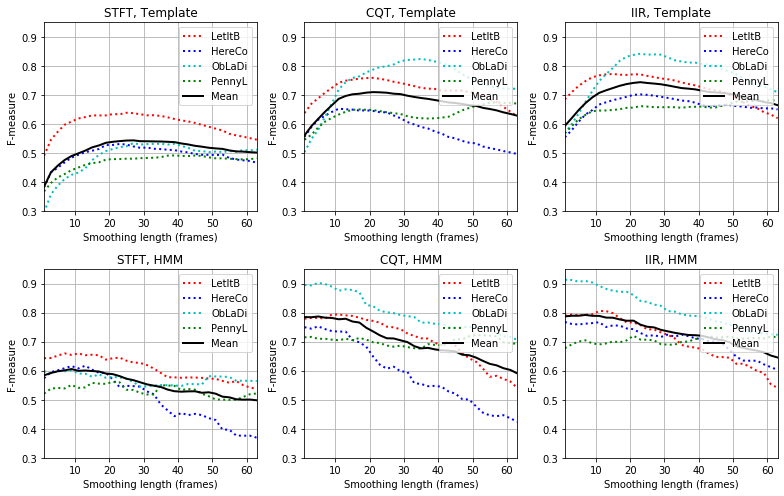

In [7]:
def compute_mean_result(result_dict, song_selected):
    S = len(song_selected)
    result_mean =  np.copy(result_dict[song_selected[0]])
    for s in range(1, S):
        result_mean = result_mean + result_dict[song_selected[s]]
    result_mean = result_mean / S
    return result_mean

def plot_statistics(para_list, song_dict, song_selected, result_dict, ax, 
                    ylim=None, title='', xlabel='', ylabel='F-measure'):
    for s in song_selected:
        color = song_dict[s][1]
        song_id = song_dict[s][0]
        ax.plot(para_list, result_dict[s], color=color, 
                linestyle=':', linewidth='2', label=song_id)
    ax.plot(para_list, compute_mean_result(result_dict, song_selected), color='k', 
            linestyle='-',linewidth='2', label='Mean')
    ax.legend(loc='upper right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid()
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.set_xlim([para_list[0], para_list[-1]])

def experiment_chord_recognition(song_selected, song_dict, X_dict, ann_dict, 
                                 para_list, para_type=None, p=0.15, 
                                 filt_len=None, filt_type='mean', detail=True):
    M = len(para_list)
    result_F_Tem = np.zeros(M)
    result_F_HMM = np.zeros(M)
    result_F_Tem_dict = {}
    result_F_HMM_dict = {}
    for s in song_selected:
        if detail is True:            
            print('Processing:', song_dict[s][0])
        for m in range(M): 
            if para_type == 'smooth':
                filt_len = para_list[m]
            if para_type == 'p':
                p = para_list[m]
            output = chord_recognition_all(X_dict[s], ann_dict[s][0], 
                                           filt_len=filt_len, filt_type=filt_type, p=p)
            result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
            result_F_Tem[m] = result_Tem[2]
            result_F_HMM[m] = result_HMM[2]
        result_F_Tem_dict[s] = np.copy(result_F_Tem)
        result_F_HMM_dict[s] = np.copy(result_F_HMM)    
    return result_F_Tem_dict, result_F_HMM_dict

song_selected = [0, 1, 2, 3]
para_list = np.arange(32) * 2 + 1    
print('===== Prefiltering experiment using STFT-based chromagrams =====')
result_STFT = experiment_chord_recognition(song_selected, song_dict, X_dict_STFT, 
                                           ann_dict_STFT, para_list, para_type='smooth', 
                                           p=0.15, filt_len=None, filt_type='mean')
print('===== Prefiltering experiment using CQT-based chromagrams =====')
result_CQT  = experiment_chord_recognition(song_selected, song_dict, X_dict_CQT, 
                                           ann_dict_CQT, para_list, para_type='smooth', 
                                           p=0.15, filt_len=None, filt_type='mean')
print('===== Prefiltering experiment using IIR-based chromagrams =====')
result_IIR  = experiment_chord_recognition(song_selected, song_dict, X_dict_IIR, 
                                           ann_dict_IIR, para_list, para_type='smooth', 
                                           p=0.15, filt_len=None, filt_type='mean')

# Plot result
fig, ax = plt.subplots(2, 3, figsize=(11, 7))
xlabel='Smoothing length (frames)'
ylim = [0.3, 0.95]
title='STFT, Template'
plot_statistics(para_list, song_dict, song_selected, result_STFT[0], ax[0, 0], 
                ylim=ylim, title=title, xlabel=xlabel)
title='STFT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_STFT[1], ax[1, 0], 
                ylim=ylim, title=title, xlabel=xlabel)
title='CQT, Template'                           
plot_statistics(para_list, song_dict, song_selected, result_CQT[0], ax[0, 1], 
                ylim=ylim, title=title, xlabel=xlabel)
title='CQT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_CQT[1], ax[1, 1], 
                ylim=ylim, title=title, xlabel=xlabel)
title='IIR, Template'                           
plot_statistics(para_list, song_dict, song_selected, result_IIR[0], ax[0, 2], 
                ylim=ylim, title=title, xlabel=xlabel)
title='IIR, HMM'
plot_statistics(para_list, song_dict, song_selected, result_IIR[1], ax[1, 2], 
                ylim=ylim, title=title, xlabel=xlabel)
plt.tight_layout()  

In the STFT case and the **template-based chord recognizer**, the F-measure is $\mathrm{F}=0.39$ for $L=1$. The recognition rates first improve with increasing $L$ and reach a maximum of roughly $\mathrm{F}=0.55$ for $L$ between $20$ and $30$. Then, the rates decrease again when further increasing $L$. A similar trend (on a higher F-measure level) can be observed when using the CQT-based and IIR-based chromagrams. 

* In all cases (`STFT`, `CQT`, `IIR`), smoothing **removes temporal fluctuations and local outliers** in the features, thus improving the frame-wise classification result. 
* Also, the smoothing may **integrate nonsynchronous notes** that musically belong to the same chord&mdash;an effect we have seen in the [Bach example with the broken chords](../C5/C5S2_ChordRec_Eval.html). 
* On the other hand, smoothing **reduces the temporal resolution** and may prevent a recognizer from detecting chords of short duration. 

For the Beatles songs, a smoothing window corresponding to roughly one to two seconds of the audio seems to be a good trade-off between increased robustness to outliers and decreased temporal resolution. This trade-off, however, is highly dependent on the chord change rate of the underlying audio material used for the experiment.

In the case of the **HMM-based chord recognizer**, temporal smoothing of the features has a less significant or even negative effect on the chord recognition accuracy. This strategy, as we discussed in [FMP notebook on HMM-based chord recognition](../C5/C5S3_ChordRec_HMM.html), already incorporates some context-aware **postfiltering** at the classification stage. Therefore, additional smoothing prior to the classification does not further improve the overall recognition result.

## Self-Transition Probability

In the context of HMM-based postfiltering, [Cho and Bello](https://ieeexplore.ieee.org/document/6691936) emphasized in their study the importance of [**self-transition probabilities**](../C5/C5S3_ChordRec_HMM.html). Even though the strengthening of certain musically prominent transitions such as the one from $\mathbf{C}$ to $\mathbf{G}$ (e.g., expressing a tonic&ndash;dominant relationship) may lead to a boost of certain musically meaningful chord changes, the main improvements come from **high self-transition probabilities** that essentially reduce the number of chord changes. 
This observation motivates the usage of a [**uniform transition probability matrix**](../C5/C5S3_ChordRec_HMM.html) in which all transitions are assigned the same (relatively small) probability value, except for the self-transitions which are assigned a much larger value. According to the study by [Cho and Bello](https://ieeexplore.ieee.org/document/6691936), even when using this uniform transition probability matrix, one obtains similar improvements to the ones when using more complex transition probability matrices. 

To define a [uniform transition probability matrix](../C5/C5S3_ChordRec_HMM.html), one needs to specify a parameter $p\in[0,1]$ used for self-transitions encoded by the main diagonal. The non-diagonal probabilities are then given by 

$$
     q = \frac{1-p}{I},
$$

where $I$ is the number of HMM states (in our scenario, we have $I=24$). In the following code cell, we present a small experiment, where we consider a sweep of self-transition parameters $p\in[0, 0.02, 0.04, \ldots, 0.98, 1]$. As can be observed, one obtains the best recognition rates of roughly $\mathrm{F}=0.60$ for $p\approx0.22$ (when using STFT-based chromagrams) and $\mathrm{F}=0.80$ for $p\approx0.18$ (when using CQT-based and IIR-based chromagrams). The parameter $p$ reflects properties with regard to the expected chord change rate, which very much depends on the statistics of the chord annotations and the feature rate used. In a data-driven machine learning context, the self-transition parameter can be regarded a **hyperparameter** which may be optimized using an independent **validation set**. 

===== Self-transition probability experiment using STFT-based chromagrams =====
Processing: LetItB
Processing: HereCo
Processing: ObLaDi
Processing: PennyL
===== Self-transition probability experiment using CQT-based chromagrams =====
Processing: LetItB
Processing: HereCo
Processing: ObLaDi
Processing: PennyL
===== Self-transition probability experiment using IIR-based chromagrams =====
Processing: LetItB
Processing: HereCo
Processing: ObLaDi
Processing: PennyL


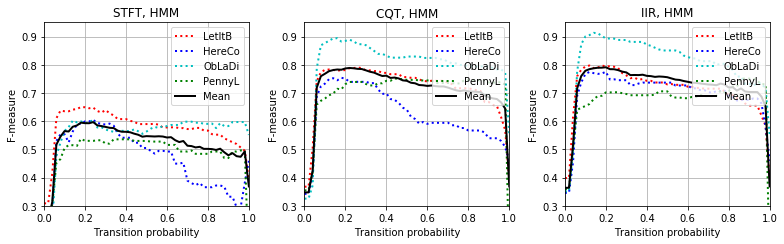

In [8]:
song_selected = [0, 1, 2, 3]
para_list = (np.arange(51)) * 0.02
print('===== Self-transition probability experiment using STFT-based chromagrams =====')
result_STFT = experiment_chord_recognition(song_selected, song_dict, X_dict_STFT, ann_dict_STFT, 
                                           para_list, para_type='p', p=0.15, filt_len=None)
print('===== Self-transition probability experiment using CQT-based chromagrams =====')
result_CQT  = experiment_chord_recognition(song_selected, song_dict, X_dict_CQT, ann_dict_CQT, 
                                           para_list, para_type='p', p=0.15, filt_len=None)
print('===== Self-transition probability experiment using IIR-based chromagrams =====')
result_IIR  = experiment_chord_recognition(song_selected, song_dict, X_dict_IIR, ann_dict_IIR, 
                                           para_list, para_type='p', p=0.15, filt_len=None)

# Plot result
fig, ax = plt.subplots(1,3, figsize=(11, 3.5))
xlabel='Transition probability'
ylim = [0.3, 0.95]
title='STFT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_STFT[1], ax[0], ylim=ylim, title=title, xlabel=xlabel)
title='CQT, HMM'
plot_statistics(para_list, song_dict, song_selected, result_CQT[1], ax[1], ylim=ylim, title=title, xlabel=xlabel)
title='IIR, HMM'
plot_statistics(para_list, song_dict, song_selected, result_IIR[1], ax[2], ylim=ylim, title=title, xlabel=xlabel)
plt.tight_layout()  

## Musical Relevance: Class Imbalance

As we have already noted before, automated harmony analysis and its evaluation based on reference annotations typically go along with significant simplifications. Therefore, evaluation measures (such as the F-measure) only give a very limited view on an algorithm's performance and the musical relevance of the recognition result. As a concrete example, let use consider a rather **dull chord recognizer** that, based on some global statistics of the song, decides on a single major or minor triad and outputs the corresponding chord label for all time frames. In the case of the song "Ob-La-Di, Ob-La-Da", this approach may recognize the song's key $\mathrm{B}^\flat$ major and outputs the same chord label for the tonic chord $\mathrm{B}^\flat$ over the entire duration of the song. As shown in the following code cell, our dull procedure achieves an F-measure of $\mathrm{F}=0.551$. This does not seem to be too bad, in particular when considering that the template-based approach using a CQT-based chromagram only achieves an accuracy of $\mathrm{F}=0.503$. 

* So, what does the value $\mathrm{F}=0.551$ tell us? 
* Is our dull procedure "better" than the template-based approach? 

Rather than solving the task of chord labeling, our dull recognizer tells us more about the statistics of the underlying data&mdash;in our case about the occurrence of the most common chord. In general, in order to be able to better assess evaluation results, it is important to include information on the data distribution. In particular an **imbalance in the class distribution** may lead to surprisingly high evaluation measures, which does not say anything about the actual performance of the underlying classification approach. Just to round off this discussion, we note that the HMM-based approach yields an F-measure of $\mathrm{F}=0.895$, which is much higher than $\mathrm{F}=0.551$ of our dull approach. As the visualization shows (see, e.g., the section between frames $1700$ and $2000$), the HMM-based approach corrects some errors of the template-based approach, where the major chord $\mathrm{E}^\flat$ (reference) is confused with the minor chord $\mathrm{E}^\flat\mathrm{m}$ (estimated). Such major&ndash;minor chord confusions are one of the most typical recognition errors encountered in automated procedure. 
<!--
This confusion is partly due to the fact that the two triads share two of three notes, the root note and fifth. In general, further confusion may arise from the existence of [harmonic partials](../C1/C1S3_HarmonicSeries.html) (e.g., the fifth harmonic of the root note equals a major third).
--> 

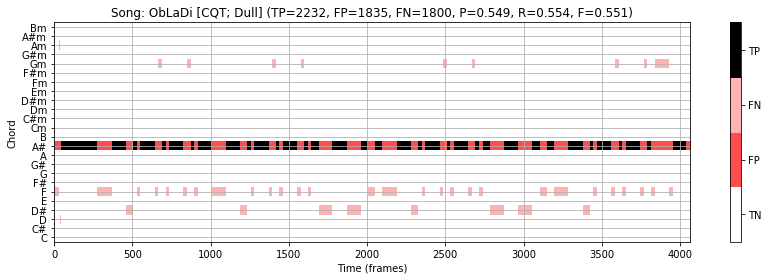

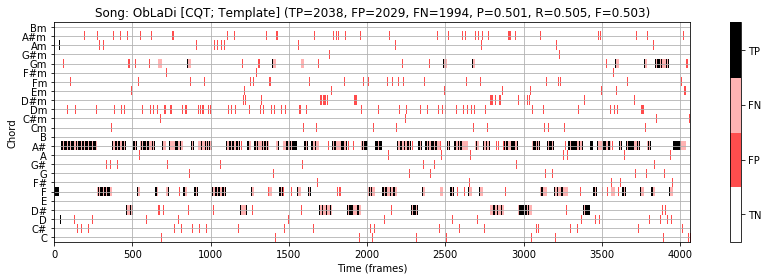

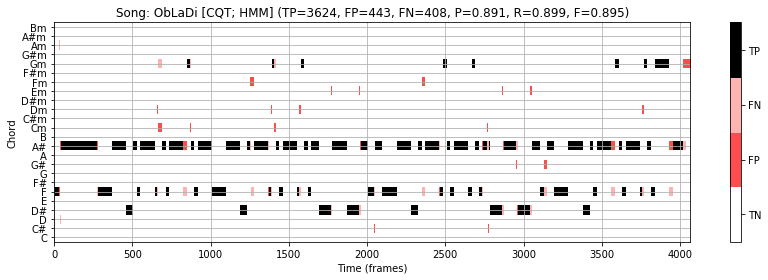

In [9]:
song_selected = [2]    
for s in song_selected:
    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    chord_dull = np.zeros(chord_Tem.shape)
    chord_dull[10, :] = 1    
    result_dull = LibFMP.C5.compute_eval_measures(ann_dict_CQT[s][0], chord_dull)    

    title='Song: %s [CQT; Dull]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_dull,
                                  chord_dull, chord_labels, title=title)
    title='Song: %s [CQT; Template]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_Tem, 
                                  chord_Tem, chord_labels, title=title)
    title='Song: %s [CQT; HMM]' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, 
                                  chord_HMM, chord_labels, title=title)

## Musical Relevance: Chord Label Reduction

Another major issue in our chord recognition approach is the limitation to only $24$ chord classes corresponding to the $12$ major and $12$ minor triads. To account for more general settings, we reduced other chord types used in the reference annotations (such as seventh, augmented, and diminished chords) to the major and minor triads using some simple heuristics. In the following, we refer to this conversion as **triad reduction**. One obvious question is if chord recognition errors occur more often in passages where such chord type reductions were employed. To investigate this question, we consider a second reduced representation where we replace any chord type that is not included in the $24$ major and minor triads by the non-chord label $\mathbf{N}$. In the following, we refer to this conversion as **non-chord reduction**. As an example, we consider the song "Penny Lane" where many such additional chord types occur in the original reference annotation. In the following plot, we show the resulting triad reduction and well as the non-chord reduction (where the non-chord label $\mathbf{N}$ is represented by the white color).

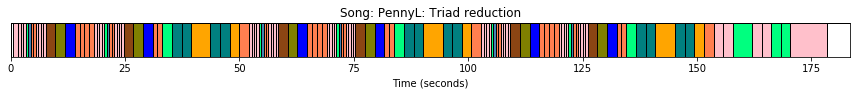

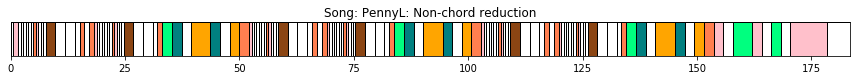

In [10]:
for s in [3]:
    song_id = song_dict[s][0]
    fn_ann = song_dict[s][3]
    fn_ann_orig = fn_ann.replace('_simplified', '')
    
    # Read original annotation (Harte) and triad-reduced annotation
    ann_orig, _ = LibFMP.C4.read_structure_annotation(fn_ann_orig)
    ann, _ = LibFMP.C4.read_structure_annotation(fn_ann)
    # Replace in original annotation all labels that were reducued by non-chord label 
    for k in range(len(ann)):
        if ann[k][2] != ann_orig[k][2]:
            ann_orig[k][2] = 'N'

    LibFMP.B.plot_segments(ann, figsize=(12, 1.2), time_label='Time (seconds)', 
                           print_labels=False, colors=color_ann, alpha=1)
    plt.title('Song: %s: Triad reduction' % song_id)    
    plt.show()
    LibFMP.B.plot_segments(ann_orig, figsize=(12, 1), 
                           print_labels=False, colors=color_ann, alpha=1)
    plt.title('Song: %s: Non-chord reduction' % song_id)
    plt.show()

Next, we evaluate our HMM-based chord recognition approach, once using the reference annotation based on triad reduction and once the one based on non-chord reduction. Recall from the [FMP notebook on chord recognition evaluation](../C5/C5S2_ChordRec_Eval.html) the following properties of our evaluation measures based the notion of relevant items:

1. An **item** $(n, \lambda)$ is an element of the set $\mathcal{I}=[1:N]\times \Lambda$. In this convention, the non-chord label $\mathbf{N}$ is left unconsidered.
2. As a result, the **relevant** (or **positive**) items are pairs $(n, \lambda^\mathrm{Ref}_{n})$ with $\lambda^\mathrm{Ref}_{n}\not=\mathbf{N}$.
3. Since our HMM-based chord recognition approach yields an estimate $\lambda_{n}\in\Lambda$ for each frame $n\in[1:N]$, the pair $(n,\lambda_{n})$ is counted as a **false positive** in the case that the frame in the reference annotation is $\lambda^\mathrm{Ref}_{n}=\mathbf{N}$.

With this in mind, let us have a look at the chord recognition result shown in the subsequent figure. Using the reference annotation based on the **triad reduction**, we obtain the precision $\mathrm{P}=0.704$, the recall $\mathrm{R}=0.726$, and the F-measure $\mathrm{F}=0.715$. Using the reference annotation based on the **non-chord reduction**, we obtain $\mathrm{P}=0.485$, $\mathrm{R}=0.925$, and $\mathrm{F}=0.636$. Note that the **increase in recall** exactly supports our hypothesis that **chord recognition errors often occur for reduced chord labels**. The **decrease in precision** is due to the fact that our chord recognizer outputs a chord label $\lambda_n\in\Lambda$ for every frame $n\in[1:N]$. This result may be improved by allowing the chord recognizer to also output the non-chord label, e.g., in the case where the output probabilities of all $24$ chord labels fall below a certain threshold.

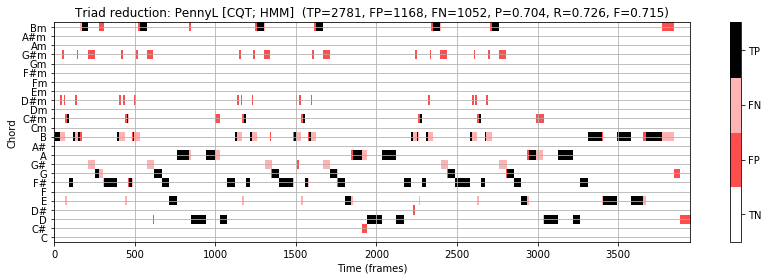

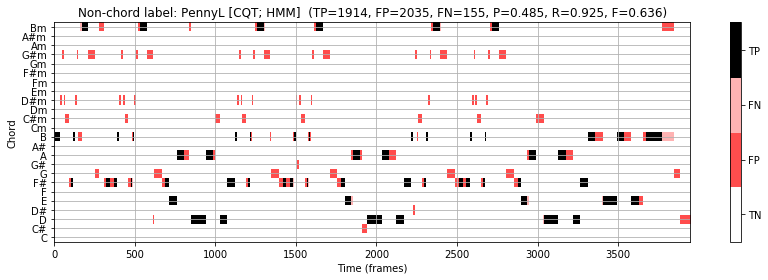

In [11]:
song_selected = [3] 
for s in song_selected:
    output = chord_recognition_all(X_dict_CQT[s], ann_dict_CQT[s][0], p=0.15)
    result_Tem, result_HMM, chord_Tem, chord_HMM, chord_sim = output
    song_id = song_dict[s][0]
    fn_ann = song_dict[s][3]
    fn_ann_orig = fn_ann.replace('_simplified', '')    
    ann_orig, _ = LibFMP.C4.read_structure_annotation(fn_ann_orig)
    output =  LibFMP.C5.convert_chord_ann_matrix(fn_ann_orig, chord_labels, Fs=Fs_X_dict_CQT[s],
                                                 N=X_dict_CQT[s].shape[1], last=False)    
    ann_matrix_N = output[0]    
    output = chord_recognition_all(X_dict_CQT[s], ann_matrix_N, p=0.15)
    result_Tem_N, result_HMM_N, chord_Tem_N, chord_HMM_N, chord_sim_N = output    
    title = 'Triad reduction: %s [CQT; HMM] ' % song_dict[s][0]
    plot_chord_recognition_result(ann_dict_CQT[s][0], result_HMM, chord_HMM, chord_labels, title=title)    
    title = 'Non-chord label: %s [CQT; HMM] ' % song_dict[s][0]
    plot_chord_recognition_result(ann_matrix_N, result_HMM_N, chord_HMM_N, chord_labels, title=title)

## Further Notes

In this notebook, we introduced the Beatles collection with its reference chord annotations, which has been of central importance in the development of automated chord recognition procedures. Based on some example songs, we illustrated the delicate interplay of the various feature extraction, filtering, and pattern matching components composing a chord recognition system&mdash;a phenomenon that is not limited to chord recognition but occurs in most music analysis and retrieval tasks. In particular, we conduct some experiments which show how the various procedures depend on the type of the underlying **chroma feature** as well as on parameters that control **temporal** and **spectral aspects**. For a detailed analysis on the interrelation of different chord recognition components, we refer to the excellent article by [Cho and Bello](https://ieeexplore.ieee.org/document/6691936). 

*  In summary, one can say that temporal feature smoothing is an easy way to improve the overall evaluation measure of chord recognizers that work in a purely frame-wise fashion. However, the "optimal" smoothing length very much depends on the chord duration distribution.

* Rather than using an averaging filter of fixed length, an alternative approach is to employ musically informed [adaptive segmentation techniques](../C6/C6S3_AdaptiveWindowing.html). For example, chord changes often go along with beat positions. Therefore, filtering could be performed in a [**beat-synchronous**](../C6/C6S3_AdaptiveWindowing.html) fashion, where each analysis window is determined by two consecutive beat positions. However, finding beat positions with automated methods is a challenging task by itself.

* Instead of modifying the features prior to the classification stage, another general approach is to perform some kind of filtering within the pattern matching step, which is exactly what the HMM-based approach is doing. We saw that the combination of **postfiltering** (using HMMs) and **prefiltering** (using feature smoothing) did not substantially improve the overall recognition result.

* In the Beatles collection, there are a number of the songs that deviate from the expected [reference pitch](../C1/C1S3_FrequencyPitch.html) $\mathrm{A4}$ with center frequency $440~\mathrm{Hz}$. As discussed in the [FMP notebook on transposition and tuning](../C3/C3S1_TranspositionTuning.html), such deviations may have fatal consequences on the quality of the chromagrams that serve as input to the chord recognizers. Therefore, one crucial step in a chord recognition system is to compensate for tuning effects by performing a [tuning estimation](../C3/C3S1_TranspositionTuning.html) and then to adjust the [center frequencies](../C1/C1S3_FrequencyPitch.html) used for the pitch-based logarithmic partitioning of the frequency axis.

* Although the Beatles collection is limited to only one rock band, experimenting with this dataset can be very instructive when developing and comparing chord recognition systems. In particular when using data-driven techniques (e.g., recent deep learning techniques), it is important to split up the dataset into disjoint subsets called **training set**, **validation set**, and **test set**. The training set can be used to adapt the chord templates or to learn certain HMM parameters. The validation set may be used to adjust hyperparameters that determine, for example, the HMM architecture. Finally, the test set should be used to test and evaluate the final system. 

* To reduce the dependency of the overall procedure on the partitioning of the dataset, one often performs multiple rounds of **cross-validation**. One way is to randomly partition the dataset into $K$ subsets of equal size (the so-called **folds**). One of the subsets is used as the test set, whereas the union of the other $K-1$ subsets is used as the training and validation set. The cross-validation is repeated $K$ times with each of the $K$ subsets serving exactly once as the test set. The $K$ results are then combined, e.g., by taking the average of the considered evaluation measure, to form a single estimate. This approach, which is commonly known as **$K$-fold cross-validation**, is frequently used to evaluate chord recognition procedures that involve some kind of training.

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/meinard">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/weiss">Christof Weiß</a>.
</div>  

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>